# Data Cleaning - Historic Hurricane Data

## Imports

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import geopandas as gpd

pd.set_option("display.max_columns", None)

## Read-In Data
Source: [IBTrACS Version 4 from the National Centers for Environmental Information](https://www.ncdc.noaa.gov/ibtracs/)

Data on tropical storm systems that have occurred in the North Atlantic Ocean was retrieved from the International Best Track Archive for Climate Stewardship (IBTrACS) on August 2, 2020. The IBTrACS data serve to provide tracking information for all tropical cyclones and storms in order to aid understanding of the distribution, frequency, and intensity of tropical storm systems. 

In [11]:
atlantic = pd.read_csv('../data/hurricanes_east_coast.csv', na_values = ' ');

C:\Users\uneck\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,3,8,9,10,11,14,15,19,20,21,23,24,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,48,49,51,52,54,55,57,58,59,60,62,63,64,65,67,68,70,71,72,73,75,76,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,95,96,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,117,118,120,121,122,123,124,125,126,127,128,129,130,131,132,134,135,136,137,138,139,140,141,142,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Selection of Relevant Columns
These are columns of data that are only relevant to the USA and are relevant to our model.

In [12]:
atlantic = atlantic[['SID','SEASON', 'NAME','ISO_TIME','LAT','LON', 'DIST2LAND', 'LANDFALL', 'USA_STATUS', 'USA_WIND', 'USA_SSHS', 'STORM_SPEED']]

#### Rename Columns

In [13]:
atlantic.rename(columns = {
    "SID" : "storm_id",
    "SEASON" : "year",
    "LAT" : "latitude",
    "LON" : "longitude",
    "DIST2LAND" : "dist2land(km)",
    "LANDFALL" : "landfall(km)",
    "USA_SSHS" : "storm_category",
    "STORM_SPEED" : "storm_speed(knots)",
    }, inplace = True)
atlantic.columns = atlantic.columns.str.lower()
atlantic.drop(index = 0, inplace = True)
atlantic.reset_index(drop = True, inplace = True)

### Selection of Only Storms That Made Landfall

In [14]:
atlantic['landfall(km)'] = atlantic['landfall(km)'].map(float)
atlantic = atlantic[atlantic['landfall(km)'] == 0]

In [15]:
atlantic.head(2)

,storm_id,year,name,iso_time,latitude,longitude,dist2land(km),landfall(km),usa_status,usa_wind,storm_category,storm_speed(knots)
19,1851175N26270,1851,NOT_NAMED,1851-06-25 21:00:00,28.1333,-96.5667,22,0.0,HU,80,1.0,5
20,1851175N26270,1851,NOT_NAMED,1851-06-26 00:00:00,28.1667,-96.8000,0,0.0,HU,70,1.0,5


#### Export to CSV and Read-In to Easily Convert Data Types

In [16]:
atlantic.to_csv('../data/hurricanes_east_coast_landfall.csv', index = False)
atlantic = pd.read_csv('../data/hurricanes_east_coast_landfall.csv')

## Visualize Current Points

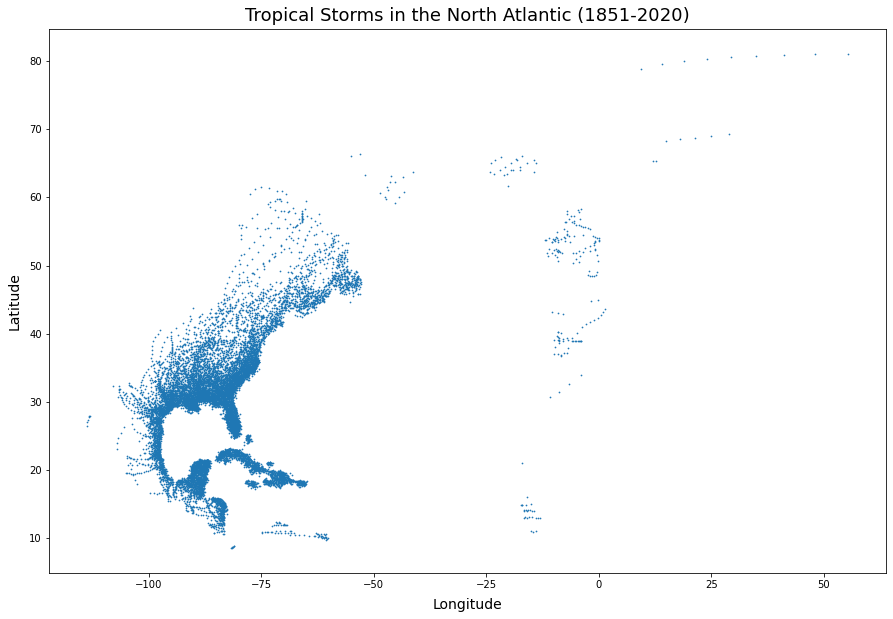

In [17]:
plt.figure(figsize= (15,10))
plt.scatter(x = atlantic["longitude"],
           y = atlantic["latitude"],
           s = 0.5);
plt.title('Tropical Storms in the North Atlantic (1851-2020)', fontdict = {'fontsize': 18}, pad = 8)
plt.xlabel('Longitude', fontdict = {'fontsize':14}, labelpad = 8)
plt.ylabel('Latitude', fontdict = {'fontsize':14}, labelpad = 8);

After removing all data points that had not yet made landfall, we can see an outline of the eastern seaboard of the Americas as some of Europe. This data also illustrates how hurricanes don't travel very far inland, primarily only affecting the coast.

## Read-In Shape Files for State and County Labeling

### USA - States
Source: [ArcGIS](http://www.arcgis.com/home/item.html?id=f7f805eb65eb4ab787a0a3e1116ca7e5)

This geopandas data frame will allows us to label the state of each point in our hurricanes data frame.

In [18]:
usa_states = gpd.read_file('../maps/states_21basic/states.shp')
usa_states.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


### USA - Counties
Source: [United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html)

This geopandas data frame will allow us to label the county of each point in our hurricanes data frame.

In [19]:
usa_counties = gpd.read_file('../maps/cb_2018_us_county_20m/cb_2018_us_county_20m.shp')
usa_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,37,017,01026336,0500000US37017,37017,Bladen,06,2265887723,33010866,"POLYGON ((-78.90200 34.83527, -78.79960 34.850..."
1,37,167,01025844,0500000US37167,37167,Stanly,06,1023370459,25242751,"POLYGON ((-80.49737 35.20210, -80.29542 35.502..."
2,39,153,01074088,0500000US39153,39153,Summit,06,1069181981,18958267,"POLYGON ((-81.68699 41.13596, -81.68495 41.277..."
3,42,113,01213687,0500000US42113,42113,Sullivan,06,1165338428,6617028,"POLYGON ((-76.81373 41.59003, -76.22014 41.541..."
4,48,459,01384015,0500000US48459,48459,Upshur,06,1509910100,24878888,"POLYGON ((-95.15274 32.66095, -95.15211 32.902..."


## Identifying Hurricane Rows Within the USA

In this step, we will compare the coordinates of each tropical storm in the North Atlantic Hurricanes data frame with the states and counties in the shape files. We will assign a state and county to each storm that made landfall in the United States.

#### Assign Hurricanes Data Frame to a Geopandas Data Frame

In [20]:
geo_df = gpd.GeoDataFrame(atlantic, geometry = gpd.points_from_xy(atlantic['longitude'], atlantic['latitude']))

In [21]:
geo_df.head(1)

,storm_id,year,name,iso_time,latitude,longitude,dist2land(km),landfall(km),usa_status,usa_wind,storm_category,storm_speed(knots),geometry
0,1851175N26270,1851,NOT_NAMED,1851-06-25 21:00:00,28.1333,-96.5667,22,0.0,HU,80.0,1.0,5.0,POINT (-96.56670 28.13330)


#### Write a Function to Check if a Point from the Hurricanes Data Frame is Within a State and County Boundary
We will store the indices of the storm and their states/counties to a dictionary.

In [22]:
def usa_region_column(df1, df2, col1, new_column = None):
    # empty dictionary
    location_dict = {}
    # iterate through hurricane points
    for point_index, point in df1['geometry'].iteritems():
        # iterate through our location dataframe
        for index, location in df2['geometry'].iteritems():
            if point.within(location) == True:
                location_dict[point_index] = df2[col1][index]      
    return location_dict

#### Assign States

In [23]:
# Iterate Through data frame
hurricane_states = usa_region_column(geo_df, usa_states, 'STATE_NAME')

# Only keep indices for storms within the USA
indices_to_keep = list(hurricane_states.keys())

# Create a new dataframe with points from the USA
geo_df_usa = geo_df.loc[indices_to_keep, :]

# Create a list of states 
states_list = list(hurricane_states.values())

# Create a 'states' column in the USA data frame
geo_df_usa['state'] = states_list

# Check shape
geo_df_usa.shape

(7155, 14)

#### Assign Counties

In [24]:
# Iterate Through data frame
hurricane_counties = usa_region_column(geo_df_usa, usa_counties, 'NAME')

# Only store indices for storms within the USA
indices_to_keep = list(hurricane_counties.keys())

# Keep rows with county information
geo_df_usa = geo_df_usa.loc[indices_to_keep, :]

# Create a list of counties
county_list = list(hurricane_counties.values())

# Create county column in data frame
geo_df_usa['county'] = county_list

In [25]:
geo_df_usa.shape

(7145, 15)

In [45]:
geo_df_usa.to_csv('../data/geo_usa.csv', index = False)

## Create Aggregates of Storm Information by County

This step will ensure that we can merge aggregate counts of historical hurricane data with current COVID-19 data.

### Functions

In [26]:
states_with_hurricanes_list = list(geo_df_usa['state'].unique())

In [27]:
# Get Count of Storms by Category for Counties in 1 State

def get_category_count(df, state, column, value):
    state_df = df[df['state'] == state].copy()
    state_df = state_df.reset_index()
    
    category_counter = {}
    
    for i in range(state_df.shape[0]):
        if state_df[column][i] == value:
            if state_df['county'][i] not in category_counter:
                category_counter[state_df['county'][i]] = 1
            else:
                category_counter[state_df['county'][i]] += 1
        else:
            if state_df['county'][i] not in category_counter:
                category_counter[state_df['county'][i]] = 0
            
    return category_counter

In [28]:
# Create a State Data Frame with Aggregate Info

def get_dfs(state, category_dict):
    df = pd.DataFrame(category_dict[state].values(), index = category_dict[state].keys())
    df['state'] = state
    return df

### Storm Category (1-5)

#### Category 1

In [29]:
category_1_dict = {}
category_1_df_list = []

for state in states_with_hurricanes_list:
    category_1_dict[state] = get_category_count(geo_df_usa, state, 'storm_category', 1.0)
    category_1_df_list.append(get_dfs(state, category_1_dict))
    
categories_df = pd.concat(category_1_df_list)
categories_df = categories_df.rename(columns = {0:'cat_1_count'})

In [30]:
# Reorder Columns
categories_df = categories_df[['state', 'cat_1_count']]

#### Category 2

In [31]:
category_2_dict = {}
category_2_df_list = []

for state in states_with_hurricanes_list:
    category_2_dict[state] = get_category_count(geo_df_usa, state, 'storm_category', 2.0)
    category_2_df_list.append(get_dfs(state, category_2_dict))
    
category_2_df = pd.concat(category_2_df_list)
categories_df['cat_2_count'] = category_2_df[0]

#### Category 3

In [32]:
category_3_dict = {}
category_3_df_list = []

for state in states_with_hurricanes_list:
    category_3_dict[state] = get_category_count(geo_df_usa, state, 'storm_category', 3.0)
    category_3_df_list.append(get_dfs(state, category_3_dict))
    
category_3_df = pd.concat(category_3_df_list)
categories_df['cat_3_count'] = category_3_df[0]

#### Category 4

In [33]:
category_4_dict = {}
category_4_df_list = []

for state in states_with_hurricanes_list:
    category_4_dict[state] = get_category_count(geo_df_usa, state, 'storm_category', 4.0)
    category_4_df_list.append(get_dfs(state, category_4_dict))
    
category_4_df = pd.concat(category_4_df_list)
categories_df['cat_4_count'] = category_4_df[0]

#### Category 5

In [34]:
category_5_dict = {}
category_5_df_list = []

for state in states_with_hurricanes_list:
    category_5_dict[state] = get_category_count(geo_df_usa, state, 'storm_category', 5.0)
    category_5_df_list.append(get_dfs(state, category_5_dict))
    
category_5_df = pd.concat(category_5_df_list)
categories_df['cat_5_count'] = category_5_df[0]

### Storm Type

#### Hurricanes

In [35]:
hu_dict = {}
hu_df_list = []

for state in states_with_hurricanes_list:
    hu_dict[state] = get_category_count(geo_df_usa, state, 'usa_status', 'HU')
    hu_df_list.append(get_dfs(state, hu_dict))
    
hu_df = pd.concat(hu_df_list)
categories_df['hurricane_count'] = hu_df[0]

#### Tropical Storms

In [36]:
ts_dict = {}
ts_df_list = []

for state in states_with_hurricanes_list:
    ts_dict[state] = get_category_count(geo_df_usa, state, 'usa_status', 'TS')
    ts_df_list.append(get_dfs(state, ts_dict))
    
ts_df = pd.concat(ts_df_list)
categories_df['tropical_storm_count'] = ts_df[0]

#### Extratropical System

In [37]:
ex_dict = {}
ex_df_list = []

for state in states_with_hurricanes_list:
    ex_dict[state] = get_category_count(geo_df_usa, state, 'usa_status', 'EX')
    ex_df_list.append(get_dfs(state, ex_dict))
    
ex_df = pd.concat(ex_df_list)
categories_df['extratropical_system_count'] = ex_df[0]

#### Tropical Depression

In [38]:
td_dict = {}
td_df_list = []

for state in states_with_hurricanes_list:
    td_dict[state] = get_category_count(geo_df_usa, state, 'usa_status', 'TD')
    td_df_list.append(get_dfs(state, td_dict))
    
td_df = pd.concat(td_df_list)
categories_df['tropical_depression_count'] = td_df[0]

#### Low Count

In [39]:
lo_dict = {}
lo_df_list = []

for state in states_with_hurricanes_list:
    lo_dict[state] = get_category_count(geo_df_usa, state, 'usa_status', 'LO')
    lo_df_list.append(get_dfs(state, lo_dict))
    
lo_df = pd.concat(lo_df_list)
categories_df['low_count'] = lo_df[0]

#### Subtropical Depression

In [40]:
sd_dict = {}
sd_df_list = []

for state in states_with_hurricanes_list:
    sd_dict[state] = get_category_count(geo_df_usa, state, 'usa_status', 'SD')
    sd_df_list.append(get_dfs(state, sd_dict))
    
sd_df = pd.concat(sd_df_list)
categories_df['subtropical_depression_count'] = sd_df[0]

#### Subtropical Storm Count

In [41]:
ss_dict = {}
ss_df_list = []

for state in states_with_hurricanes_list:
    ss_dict[state] = get_category_count(geo_df_usa, state, 'usa_status', 'SS')
    ss_df_list.append(get_dfs(state, ss_dict))
    
ss_df = pd.concat(ss_df_list)
categories_df['subtropical_storm_count'] = ss_df[0]

#### Dissipating Storms

In [42]:
ds_dict = {}
ds_df_list = []

for state in states_with_hurricanes_list:
    ds_dict[state] = get_category_count(geo_df_usa, state, 'usa_status', 'DB')
    ds_df_list.append(get_dfs(state, ds_dict))
    
ds_df = pd.concat(ds_df_list)
categories_df['dissipating_storm_count'] = ds_df[0]

### Combining All Storm Categories and Types

In [43]:
categories_df['county'] = categories_df.index

categories_df = categories_df.reset_index()

# Confirm that counties with same name have state preserved
categories_df[categories_df['county'] == 'Clark']

,index,state,cat_1_count,cat_2_count,cat_3_count,cat_4_count,cat_5_count,hurricane_count,tropical_storm_count,extratropical_system_count,tropical_depression_count,low_count,subtropical_depression_count,subtropical_storm_count,dissipating_storm_count,county
1074,Clark,Arkansas,0,0,0,0,0,0,0,0,4,0,0,0,0,Clark
1146,Clark,Kentucky,0,0,0,0,0,0,0,0,1,0,0,0,0,Clark
1250,Clark,Indiana,0,0,0,0,0,0,0,2,0,1,0,0,0,Clark


In [44]:
categories_df.shape

(1536, 16)

## Export Data to CSV

In [36]:
#categories_df.to_csv('../data/aggregate_storm_data.csv', index = False)